In [1]:
import pandas as pd
import geopandas as geo
from tqdm import tqdm_notebook
from shapely import geometry

In [9]:
DATA_FOLDER = "./data/"

In [3]:
fishnet = geo.read_file(DATA_FOLDER + "fishnet/fishnet.shp")

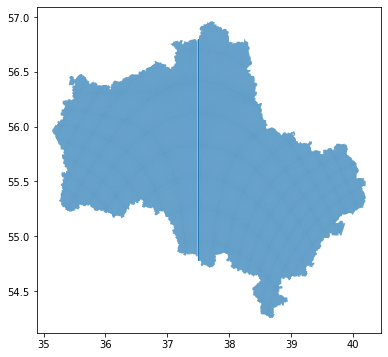

In [4]:
fishnet.plot(figsize=(12, 6))

# Find polygons for points

In [10]:
points = pd.read_csv(DATA_FOLDER + "final_df.csv")

In [12]:
points

,date,address,Point
0,2020-05-14T16:20:34.516Z,"Город Москва, Бульвар Дмитрия Донского Дом 11 ...",37.578612 55.566181
1,2020-05-29T17:38:43.570Z,"Город Москва, Бульвар Дмитрия Донского Дом 11 ...",37.578612 55.566181
2,2020-05-18T10:14:42.992Z,"Город Москва, Бульвар Дмитрия Донского Дом 11 ...",37.578612 55.566181
3,2020-06-01T13:15:32.918Z,"Город Москва, Бульвар Дмитрия Донского Дом 11 ...",37.578612 55.566181
4,2020-06-21T10:46:46.946Z,"Город Москва, Бульвар Дмитрия Донского Дом 11 ...",37.578612 55.566181
...,...,...,...
227672,2020-05-26T11:15:28.879Z,"город москва, верхняя красносельская улица, до...",NaN
227673,2020-05-26T11:11:23.574Z,"город москва, верхняя красносельская улица, до...",NaN
227674,2020-06-01T10:50:49.546Z,"город москва, верхняя красносельская улица, до...",NaN
227675,2020-05-15T08:52:54.042Z,"город москва, 2-й верхний михайловский проезд,...",NaN


In [13]:
points.Point.isnull().sum()

20900

In [14]:
not_null_points = points.loc[~points.Point.isnull()].copy()

In [15]:
not_null_points['lat'] = not_null_points.Point.transform(lambda x: float(x.split(" ")[0]))
not_null_points['long'] = not_null_points.Point.transform(lambda x: float(x.split(" ")[1]))

In [16]:
unique_points = not_null_points.drop_duplicates(subset="address")

In [17]:
unique_points

,date,address,Point,lat,long
0,2020-05-14T16:20:34.516Z,"Город Москва, Бульвар Дмитрия Донского Дом 11 ...",37.578612 55.566181,37.578612,55.566181
5,2020-05-10T12:38:01.157Z,"Город Москва, Бульвар Северный Дом 21",37.619405 55.869647,37.619405,55.869647
6,2020-05-22T13:28:14.875Z,"Город Москва, Улица Бирюлёвская Дом 3 Корпус 2",37.664734 55.600359,37.664734,55.600359
8,2020-05-14T17:27:42.238Z,"Город Москва, Улица Марии Ульяновой Дом 12",37.524848 55.681757,37.524848,55.681757
9,2020-05-16T12:31:57.140Z,"Город Москва, Бульвар Северный Дом 5А",37.603361 55.867556,37.603361,55.867556
...,...,...,...,...,...
227210,2020-05-16T18:21:51.416Z,"город москва, большая академическая улица, дом 57",37.543659 55.838865,37.543659,55.838865
227211,2020-06-11T12:29:43.881Z,"город москва, малая черкизовская улица, дом 66",37.713881 55.80698,37.713881,55.806980
227212,2020-05-12T14:05:00.266Z,"город москва, большая пионерская улица, дом 37/38",37.635287 55.725569,37.635287,55.725569
227233,2020-06-17T12:25:13.070Z,"город москва, большая черкизовская улица, дом ...",37.717052 55.795231,37.717052,55.795231


In [18]:
points = []
lat = unique_points.lat.values
long = unique_points.long.values
for i in tqdm_notebook(range(len(lat))):
    points.append(geometry.Point(lat[i], long[i]))

/home/pburtovoy/.conda/envs/hackaton/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [19]:
unique_points['point_geo'] = points

/home/pburtovoy/.conda/envs/hackaton/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
unique_points

,date,address,Point,lat,long,point_geo
0,2020-05-14T16:20:34.516Z,"Город Москва, Бульвар Дмитрия Донского Дом 11 ...",37.578612 55.566181,37.578612,55.566181,POINT (37.578612 55.566181)
5,2020-05-10T12:38:01.157Z,"Город Москва, Бульвар Северный Дом 21",37.619405 55.869647,37.619405,55.869647,POINT (37.619405 55.869647)
6,2020-05-22T13:28:14.875Z,"Город Москва, Улица Бирюлёвская Дом 3 Корпус 2",37.664734 55.600359,37.664734,55.600359,POINT (37.664734 55.600359)
8,2020-05-14T17:27:42.238Z,"Город Москва, Улица Марии Ульяновой Дом 12",37.524848 55.681757,37.524848,55.681757,POINT (37.524848 55.681757)
9,2020-05-16T12:31:57.140Z,"Город Москва, Бульвар Северный Дом 5А",37.603361 55.867556,37.603361,55.867556,POINT (37.603361 55.867556)
...,...,...,...,...,...,...
227210,2020-05-16T18:21:51.416Z,"город москва, большая академическая улица, дом 57",37.543659 55.838865,37.543659,55.838865,POINT (37.543659 55.838865)
227211,2020-06-11T12:29:43.881Z,"город москва, малая черкизовская улица, дом 66",37.713881 55.80698,37.713881,55.806980,POINT (37.713881 55.80698)
227212,2020-05-12T14:05:00.266Z,"город москва, большая пионерская улица, дом 37/38",37.635287 55.725569,37.635287,55.725569,POINT (37.635287 55.725569)
227233,2020-06-17T12:25:13.070Z,"город москва, большая черкизовская улица, дом ...",37.717052 55.795231,37.717052,55.795231,POINT (37.717052 55.795231)


In [21]:
df_for_mapping = unique_points[['address', 'point_geo']]

In [22]:
from multiprocessing import Pool

In [23]:
fishnet_geometry_list = fishnet.geometry.values
fishnet_cell_id_list = fishnet.cell_id.values

In [24]:
def find_polygon_id(point):
    for i in range(len(fishnet_geometry_list)):
        if point.within(fishnet_geometry_list[i]):
            return fishnet_cell_id_list[i]

In [25]:
pool = Pool(40)

In [26]:
results = pool.map(find_polygon_id, points)

In [27]:
len(results)

43161

In [28]:
unique_points['cell_id'] = results

/home/pburtovoy/.conda/envs/hackaton/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
unique_points

,date,address,Point,lat,long,point_geo,cell_id
0,2020-05-14T16:20:34.516Z,"Город Москва, Бульвар Дмитрия Донского Дом 11 ...",37.578612 55.566181,37.578612,55.566181,POINT (37.578612 55.566181),56834.0
5,2020-05-10T12:38:01.157Z,"Город Москва, Бульвар Северный Дом 21",37.619405 55.869647,37.619405,55.869647,POINT (37.619405 55.869647),117447.0
6,2020-05-22T13:28:14.875Z,"Город Москва, Улица Бирюлёвская Дом 3 Корпус 2",37.664734 55.600359,37.664734,55.600359,POINT (37.664734 55.600359),71181.0
8,2020-05-14T17:27:42.238Z,"Город Москва, Улица Марии Ульяновой Дом 12",37.524848 55.681757,37.524848,55.681757,POINT (37.524848 55.681757),136795.0
9,2020-05-16T12:31:57.140Z,"Город Москва, Бульвар Северный Дом 5А",37.603361 55.867556,37.603361,55.867556,POINT (37.603361 55.867556),73435.0
...,...,...,...,...,...,...,...
227210,2020-05-16T18:21:51.416Z,"город москва, большая академическая улица, дом 57",37.543659 55.838865,37.543659,55.838865,POINT (37.543659 55.838865),186943.0
227211,2020-06-11T12:29:43.881Z,"город москва, малая черкизовская улица, дом 66",37.713881 55.80698,37.713881,55.806980,POINT (37.713881 55.80698),91433.0
227212,2020-05-12T14:05:00.266Z,"город москва, большая пионерская улица, дом 37/38",37.635287 55.725569,37.635287,55.725569,POINT (37.635287 55.725569),115175.0
227233,2020-06-17T12:25:13.070Z,"город москва, большая черкизовская улица, дом ...",37.717052 55.795231,37.717052,55.795231,POINT (37.717052 55.795231),87965.0


In [30]:
unique_points[['date', 'address', 'lat', 'long', 'cell_id']].to_csv(DATA_FOLDER + "address_cell_id.csv", index=False)

# Find neighbors

In [91]:
fishnet_geometry_list = fishnet.geometry.values
fishnet_cell_id_list = fishnet.cell_id.values

In [111]:
def find_neighbors(args):
    cell, geom = args
    nbs = fishnet[~fishnet.geometry.disjoint(geom)].cell_id.values
    nbs = nbs[nbs != cell]
    return cell, nbs

In [112]:
pool = Pool(40)

In [113]:
results = pool.map(find_neighbors, zip(fishnet_cell_id_list, fishnet_geometry_list))

In [115]:
import pickle
with open(DATA_FOLDER + "neighbors.pkl", "wb") as fout:
    pickle.dump(results, fout)

In [117]:
fishnet.head()

,cell_id,cell_area,cell_area2,geometry
0,72137,249834.0,427489.0,"POLYGON ((38.67892 54.29088, 38.67905 54.29537..."
1,9759,249843.0,427928.0,"POLYGON ((38.56479 54.33238, 38.56490 54.33687..."
2,118792,249834.0,428368.0,"POLYGON ((38.68905 54.37614, 38.68918 54.38064..."
3,33066,249729.0,439110.0,"POLYGON ((40.14095 55.40463, 40.14125 55.40912..."
4,59909,249897.0,439766.0,"POLYGON ((37.85167 55.43713, 37.85171 55.44162..."


In [118]:
neighbors = [x for _, x in results]

In [120]:
fishnet["neighbors_list"] = neighbors

In [122]:
fishnet.to_parquet(DATA_FOLDER + "fisnet_with_neighbors.parquet")

/home/pburtovoy/.conda/envs/hackaton/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: this is an initial implementation of Parquet/Feather file support and associated metadata.  This is tracking version 0.1.0 of the metadata specification at https://github.com/geopandas/geo-arrow-spec

This metadata specification does not yet make stability promises.  We do not yet recommend using this in a production setting unless you are able to rewrite your Parquet/Feather files.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')
  """Entry point for launching an IPython kernel.
